### Non Intel Optimised Mistral 7B

In [2]:
!pip install -q -U transformers
!pip install -q -U accelerate
!pip install -q -U bitsandbytes


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import time

device = "cuda" # the device to load the model onto

model = AutoModelForCausalLM.from_pretrained("/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1")
tokenizer = AutoTokenizer.from_pretrained("/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1")
start = time.time()
messages = [
    {"role": "user", "content": "What does the company intel do?"}
]

encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt")

model_inputs = encodeds#.to(device)
#model.to(device)

generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True)
decoded = tokenizer.batch_decode(generated_ids)
end = time.time()
mistral7b = end-start
print(decoded[0])
print(f"\nTime taken is: {mistral7b}")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST] What does the company intel do? [/INST] Company Intel is a software company that provides various products and services, mainly related to data analytics and machine learning. The company offers a wide range of solutions, including:

* Predictive maintenance: This service helps organizations predict equipment failures and maintenance costs by using machine learning algorithms.
* Process optimization: The company helps companies optimize their processes through data analytics and machine learning.
* Customer behavior analysis: Through machine learning and data analytics, Company Intel helps companies understand customer behavior and preferences.
* Supply chain optimization: Company Intel helps companies optimize their supply chain operations through data analytics and machine learning.
* Data science: The company provides data science and machine learning services to organizations.

Overall, Company Intel's main focus is to help organizations make data-driven decisions and im

### Intel Optimised Mistral 7b

In [1]:
!pip install -q auto-gptq --no-build-isolation
!pip install -q einops
!pip install -q --upgrade-strategy eager "optimum[ipex]"
! pip install -q -U git+https://github.com/huggingface/transformers.git
! pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q ipywidgets

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
optimum 1.18.0 requires transformers[sentencepiece]<4.40.0,>=4.26.0, but you have transformers 4.40.0.dev0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
optimum 1.18.0 requires transformers[sentencepiece]<4.40.0,>=4.26.0, but you have transformers 4.40.0.dev0 which is incompatible.


In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import time
quantized_model_dir = "Intel/Mistral-7B-v0.1-int4-inc"
model = AutoModelForCausalLM.from_pretrained(quantized_model_dir,
                                             device_map="auto",
                                             trust_remote_code=False,
                                             )
tokenizer = AutoTokenizer.from_pretrained(quantized_model_dir, use_fast=True)
start = time.time()
print(tokenizer.decode(model.generate(**tokenizer("What does the company intel do?", return_tensors="pt").to(model.device),max_new_tokens=50)[0]))
end = time.time()
intel_mistral = end-start
print(f"Time taken: {intel_mistral}")

config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

2024-04-03 10:03:33.366314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 10:03:33.366407: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 10:03:33.553150: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/4.16G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py:4365: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/966 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> What does the company intel do?

The company intel is a tool that allows you to see the company's information, such as the company's name, address, phone number, and website.

How do I use the company intel?

To use the
Time taken: 40.57386302947998


### Intel Optimised Neural-Chat

In [1]:
!pip install -q intel-extension-for-transformers
!pip install -q yacs fastchat uvicorn fastapi accelerate datasets

In [3]:
from intel_extension_for_transformers.neural_chat import build_chatbot
import time

chatbot = build_chatbot()
start = time.time()
result = chatbot.predict(query="What does the company Intel do?")
end = time.time()
print(result)
intel_neural = end-start
print(f"Time taken: {intel_neural}")

Loading model Intel/neural-chat-7b-v3-1


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Intel, a leading technology company, primarily focuses on designing and manufacturing advanced semiconductor chips for various applications such as personal computers, servers, mobile devices, and more. They strive to innovate and deliver high-quality products that enhance performance, efficiency, and connectivity in today's digital world. Additionally, they contribute to research and development in emerging technologies like artificial intelligence, autonomous driving, and 5G networks.
Time taken: 4.566130638122559


### Performace Comparison 

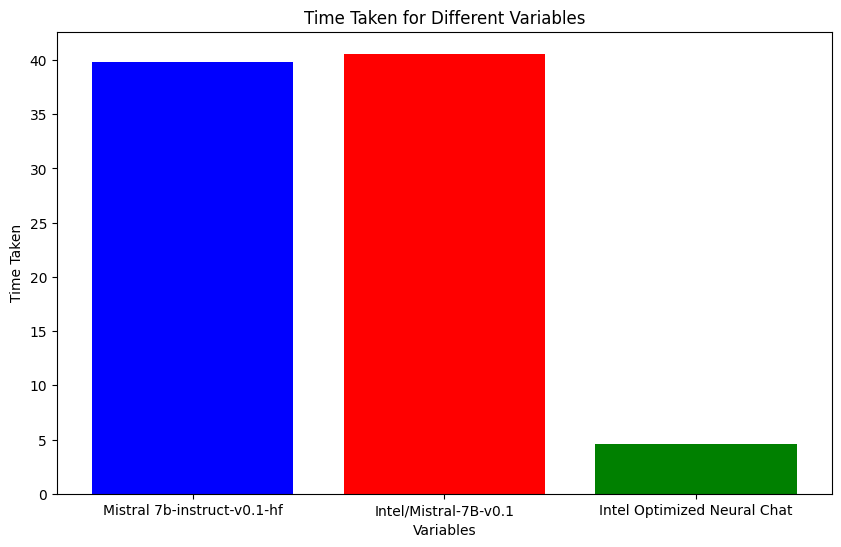

In [8]:
import matplotlib.pyplot as plt

# Variables and their corresponding values
variables = ['Mistral 7b-instruct-v0.1-hf', 'Intel/Mistral-7B-v0.1', 'Intel Optimized Neural Chat']
values = [mistral7b, intel_mistral, intel_neural]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(variables, values, color=['blue', 'red', 'green'])
plt.xlabel('Variables')
plt.ylabel('Time Taken')
plt.title('Time Taken for Different Variables')
plt.show()
